In [16]:
# Read the csv file
import pandas as pd
file_path = 'data/overlapping_skills_limit7.csv'
df = pd.read_csv(file_path)
df

,skill_name,analytics_skill_count,science_skill_count,engineering_skill_count,total_count
0,sql,127752,97835,142062,367649
1,python,76506,140012,137245,353763
2,aws,13020,33779,81578,128377
3,r,40362,72526,15211,128099
4,tableau,65893,35472,23519,124884
5,excel,92482,20886,9997,123365
6,azure,15759,27227,77054,120040


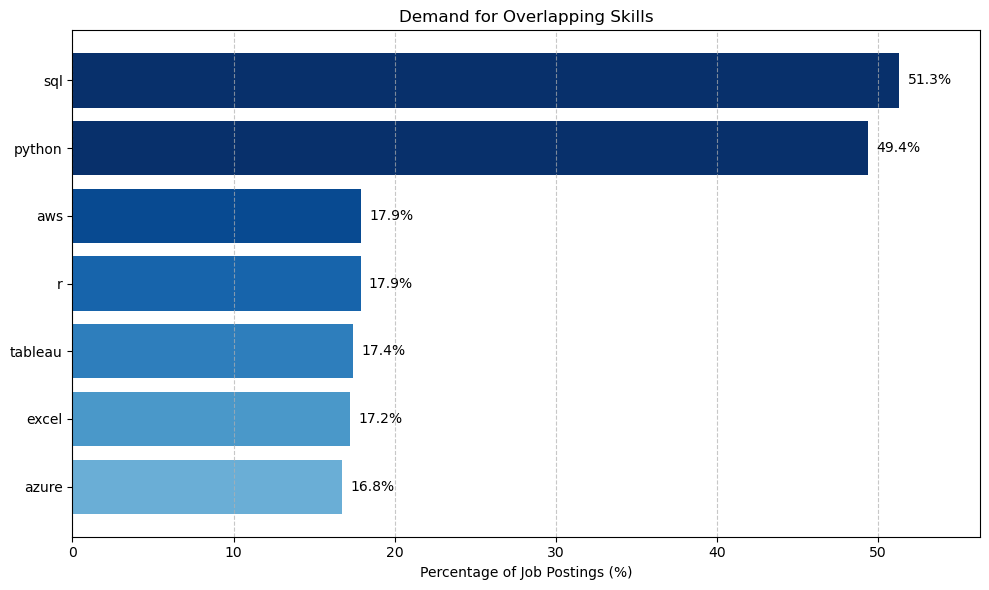

In [17]:
# Change to ascending order (the graph is populated from bottom up)
import matplotlib.pyplot as plt
import numpy as np

sorted_df = df.sort_values(by='total_count', ascending=True)

# Calculate the percentage for each skill (based on the total_count of each skill)
total_job_postings = 716_215
sorted_df['percentage'] = ( (sorted_df['total_count'] / total_job_postings) * 100 )

# Horizontal Bar Chart Design

# Figure Size & Palette
plt.figure(figsize=(10, 6))
# Create a color gradient scheme for the different skills
gradient_colors = plt.cm.Blues(np.linspace(0.5, 1.1, 7))  # Blue gradient

# Create the horizontal bar chart
plt.barh(sorted_df['skill_name'], sorted_df['percentage'], color=gradient_colors)

# Add labels and title 
plt.xlabel('Percentage of Job Postings (%)')
plt.title('Demand for Overlapping Skills')

# Display percentage values on the bars
for index, value in enumerate(sorted_df['percentage']): # enumerate() returns the index and value for each entry in the 'percentage' column
    plt.text(value + 0.5, index, f'{value:.1f}%', va='center') #For each skill it places a text label on the plot
    # X-Axis Position = value + 0.5 (to offset the text from the bar)
    # Y-Axis Position = index (at the position of each skill on the y-axis)
    #Label = f'{value:.1f}%' (percentage formatted to 1 decimal place followed by a percent sign)
    #Alignment = va='center' (center the text vertically relative to its y-coordinate)

# Show the plot
plt.xlim(0, max(sorted_df['percentage']) + 5)  # Adjust x-axis limit for better visibility
plt.grid(axis='x', linestyle='--', alpha=0.7) #Grid along the x-axis, dashed lines, and transparency level to 0.7 (not fully opaque)
plt.tight_layout()  # Adjust layout to prevent clipping of labels (optimizes the layout of the elements within the figure)
plt.savefig("assets/overlapping_skills_barh.png", format='png', dpi=300, bbox_inches='tight') #tight layout around the figure (ensures that any extra whitespace around the figure is minimized when saving it)
plt.show()

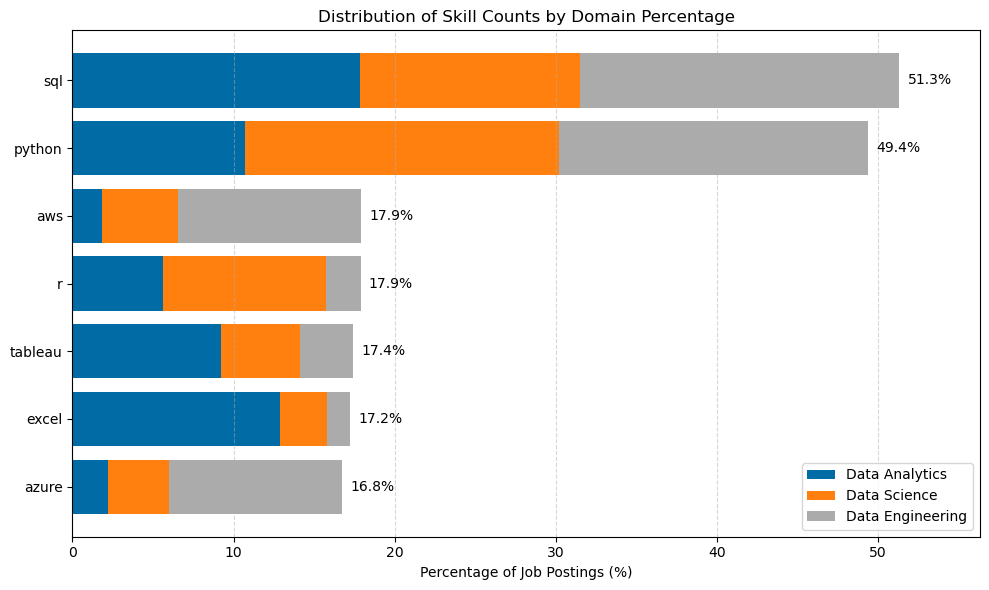

In [18]:
# Change to ascending order (the graph is populated from bottom up)
import matplotlib.pyplot as plt
sorted_df = df.sort_values(by='total_count', ascending=True)

# Calculate the percentage for each skill (all counts)
total_job_postings = 716_215
sorted_df['percentage'] = ((sorted_df['total_count'] / total_job_postings) * 100)
sorted_df['analytics_percentage'] = ((sorted_df['analytics_skill_count'] / total_job_postings) * 100)
sorted_df['science_percentage'] = ((sorted_df['science_skill_count'] / total_job_postings) * 100)
sorted_df['engineering_percentage'] = ((sorted_df['engineering_skill_count'] / total_job_postings) * 100)

# Horizontal Bar Chart Design

# Figure Size & Palette
plt.figure(figsize=(10, 6))
plt.style.use('tableau-colorblind10')
plt.barh(sorted_df['skill_name'], sorted_df['analytics_percentage'], label='Data Analytics')
plt.barh(sorted_df['skill_name'], sorted_df['science_percentage'], left=sorted_df['analytics_percentage'], label='Data Science')
plt.barh(sorted_df['skill_name'], sorted_df['engineering_percentage'], left=sorted_df['analytics_percentage'] + sorted_df['science_percentage'], label='Data Engineering')

# Display percentage values on the bars
for index, value in enumerate(sorted_df['percentage']): # enumerate() returns the index and value for each entry in the 'percentage' column
    plt.text(value + 0.5, index, f'{value:.1f}%', va='center') #For each skill it places a text label on the plot
    # X-Axis Position = value + 0.5 (to offset the text from the bar)
    # Y-Axis Position = index (at the position of each skill on the y-axis)
    #Label = f'{value:.1f}%' (percentage formatted to 1 decimal place followed by a percent sign)
    #Alignment = va='center' (center the text vertically relative to its y-coordinate)

# Show the plot
plt.xlabel('Percentage of Job Postings (%)')
plt.title('Distribution of Skill Counts by Domain Percentage')
plt.legend()
plt.xlim(0, max(sorted_df['percentage']) + 5)  # Adjust x-axis limit for better visibility
plt.grid(axis='x', linestyle='--', alpha=0.5) #Grid along the x-axis, dashed lines, and transparency level to 0.7 (not fully opaque)
plt.tight_layout()  # Adjust layout to prevent clipping of labels (optimizes the layout of the elements within the figure)
plt.savefig("assets/overlapping_skills_stacked_barh.png", format='png', dpi=300, bbox_inches='tight') #tight layout around the figure (ensures that any extra whitespace around the figure is minimized when saving it)
plt.show()